## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

Сначала проверим наличие пропусков в данных

In [4]:
X.isna().any().any()

False

Пропуски отсутствуют

Проверим наличие категориальных признаков

In [5]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

Видим, что все признаки имеют тип float64, таким образом предположим, что категориальные признаки отсутствуют

In [6]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Действительно, котегориальные признаки отсутствуют

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
columns = X_train.columns

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=columns)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neighbour_nums = [1, 3, 5, 10, 15, 25]
train_cols = ['alcohol', 'magnesium']
results_col_names = ['NN', 'Train', 'Test']
results = list()
models = list()

for num in neighbour_nums:
    model = KNeighborsClassifier(n_neighbors=num)
    model.fit(X_train[train_cols], y_train)
    
    models.append(model)
    
    train_prediction = model.predict(X_train[train_cols])
    test_prediction = model.predict(X_test[train_cols])
    
    acc_train = accuracy_score(y_train, train_prediction)
    acc_test = accuracy_score(y_test, test_prediction)
    
    results.append([num, acc_train, acc_test])

pd.DataFrame(results, columns=results_col_names)

,NN,Train,Test
0,1,0.991935,0.666667
1,3,0.838710,0.648148
2,5,0.806452,0.685185
3,10,0.806452,0.703704
4,15,0.782258,0.685185
5,25,0.725806,0.685185


Меня очень удивило, что точность на модели с 1 соседом не 100%, давайте выясним почему. Для этого сначала найдем объект, на котором модель совершает ошибку

In [9]:
model = KNeighborsClassifier(n_neighbors=1, p=2)
model.fit(X_train[train_cols], y_train)


# я сделал через цикл, для лучшей визуализации результата
for idx, test, pred in zip(range(X_train.shape[0]), y_train, model.predict(X_train[train_cols])):
    if test != pred:
        print(idx, test, pred)

1 1 2


Это объект с индексом 1 (порядковый индекс), найдем для него ближайшего соседа

In [10]:
model.kneighbors([X_train.iloc[1][train_cols]], n_neighbors=1, return_distance=False)

array([[88]], dtype=int64)

Посмотрим на наших соседей

In [11]:
pd.DataFrame((X_train.iloc[1].values, X_train.iloc[88]), columns=X.columns)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.540882,-0.612994,-1.427534,0.28818,-1.037487,-0.112585,-0.086751,-0.350476,-0.195036,-0.933495,0.346530,1.330768,-0.215063
1,-0.540882,-1.059316,-0.430583,-0.57636,-1.037487,-0.419748,-1.417735,1.870058,-0.592067,0.218440,-0.899093,-1.496340,-0.287557


Легко заметить, что у двух объектов совпадают столбцы alcohol и magnesium, однако их классы отличаются

In [12]:
print(y_train[1], y_train[88])

1 2


Собственно объяснение заключается в том, что модель путает эти два объекта, так как в двумерном пространстве, состоящем из признаков alcohol и magnesium, эти объекты не отличаются, однако в целом их классы различны

**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [13]:
!pip install mlxtend

You should consider upgrading via the 'c:\users\dima1\anaconda3\python.exe -m pip install --upgrade pip' command.


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [14]:
from mlxtend.plotting import plot_decision_regions
import itertools
from matplotlib.gridspec import GridSpec

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

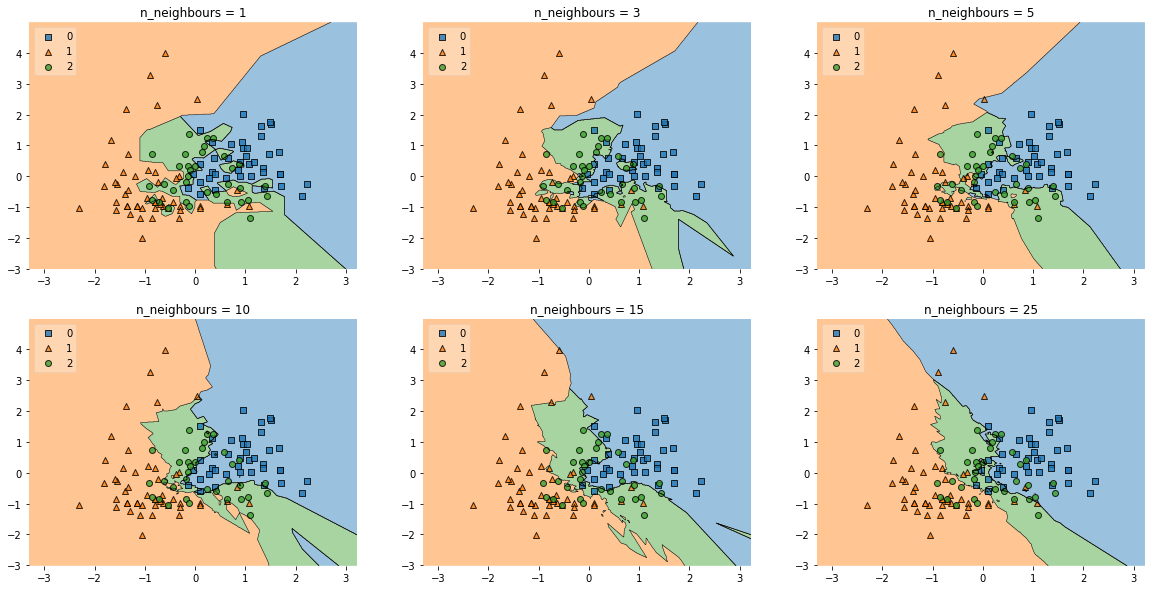

In [15]:
fig = plt.figure(figsize=(20,10))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5',
          'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']
gs = GridSpec(2, 3)

for clf, lab, grd in zip(models,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train[train_cols].values, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Лучше всего использовать k = 5. Разделяющая поверхность в этом случае имеет наименьшее количество артефкатов и наилучшим образом, с моей точки зрения, описывает возможную истинную зависимость (хотя на тесте при данном значении гиперпараметра модель не достигла наилучшего результата, хоть и неплохого, это может быть результатом неудачного рзабиения выборки на трейн и тест, для того чтобы точно понять так ли это, хорошо бы провести кросс валидацию)

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

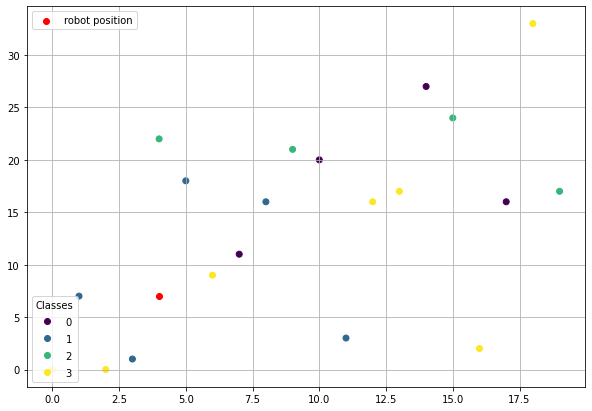

In [16]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [initial_position]
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k).fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        outcome = np.random.binomial(1, 0.8)
        
        if outcome == 1:
            current_move = self.knn.predict(self.trajectory[-1].reshape(1, -1))[0]
            self.trajectory.append(self.trajectory[-1] + self.mapping[current_move])
        else:
            self.trajectory.append(self.trajectory[-1] + self.mapping[0])
        

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [19]:
# Я немного поменял функцию для следующего задания
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.array(robot.trajectory)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

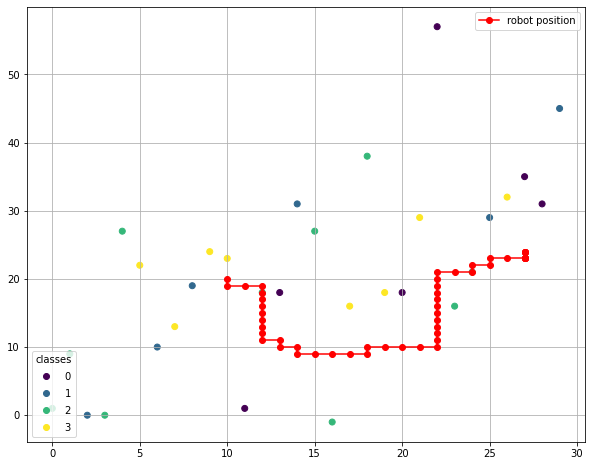

In [20]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

<Figure size 1440x720 with 0 Axes>

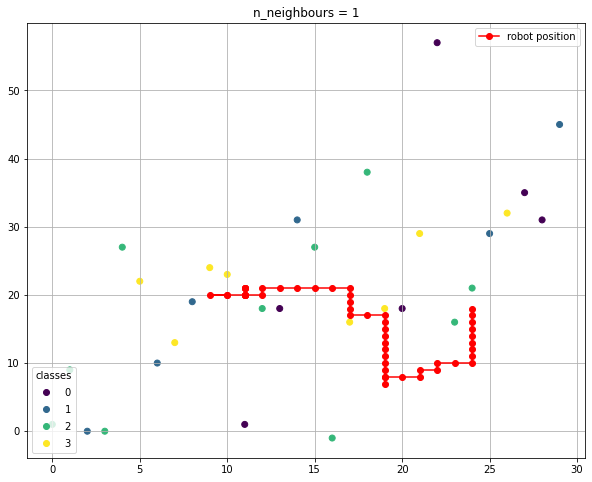

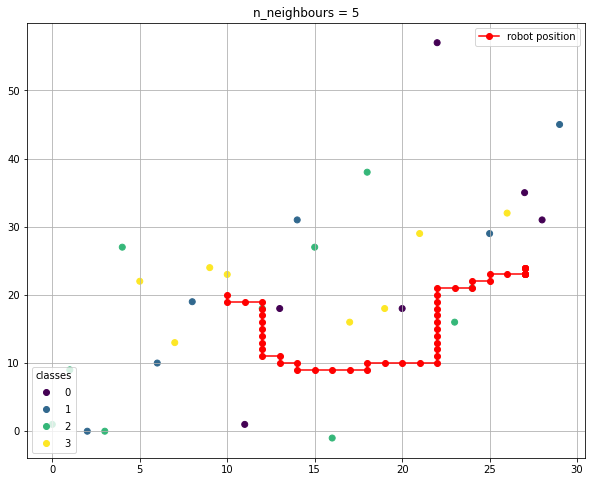

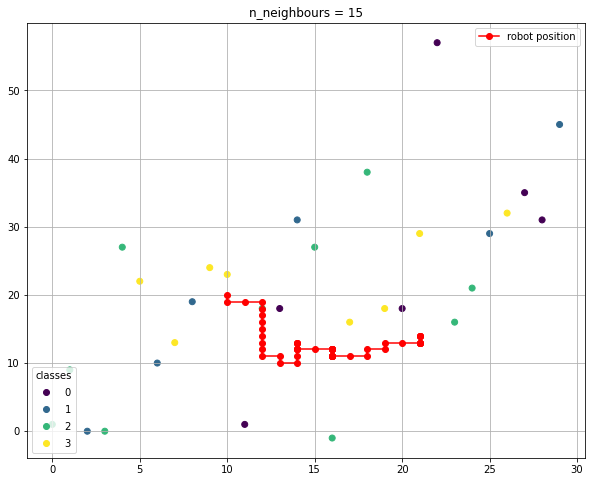

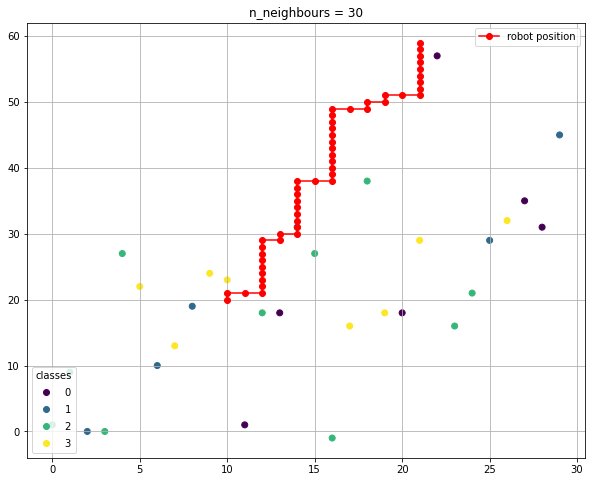

In [21]:
fig = plt.figure(figsize=(20,10))

n_neighbours = [1, 5, 15, 30]
labels = ['n_neighbours = 1', 'n_neighbours = 5', 'n_neighbours = 15', 'n_neighbours = 30']


for k, label in zip(n_neighbours, labels):
    conduct_experiment(x, mean = 3, std = 10, k = k, n_movements = 50)
    plt.title(label)

Чем больше число соседей, тем чаще мы ходим в сторону наиболее распространенного класса, однако все равно, всегда со смещением вправо (если наиболее часто встречаемый класс не отвечает за движение влево). Если число соседей маленькому числу, то мы робот будет двигаться опираясь только на ближайшие точки, то есть чем больше число k, тем больше "поле зрения робота". Если бы мы расставили точки не случайным образом, возможно мы бы увидели осмысленное, контролируемое движение.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [22]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [23]:
# Пропущенных значений в данных нет
data.isna().any()

Unnamed: 0    False
carat         False
cut           False
color         False
clarity       False
depth         False
table         False
price         False
x             False
y             False
z             False
dtype: bool

In [24]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [25]:
# Есть индексовый столбец, который не понадобится при обучении
# Остальные столбцы скорее всего несут важную информацию

data.drop('Unnamed: 0', axis=1, inplace=True)

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

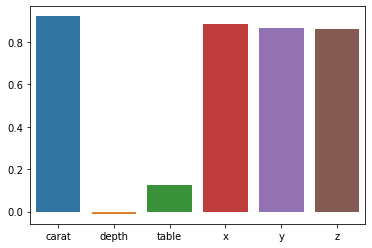

In [26]:
real_columns = data.loc[:, data.dtypes == 'float64'].columns
sns.barplot(x=real_columns, y=data.loc[:, data.dtypes == 'float64'].corrwith(data.price))

In [27]:
correlations = data.loc[:, np.append(real_columns, 'price')].corr()
correlations

,carat,depth,table,x,y,z,price
carat,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387,0.921591
depth,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924,-0.010647
table,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929,0.127134
x,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772,0.884435
y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006,0.865421
z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000,0.861249
price,0.921591,-0.010647,0.127134,0.884435,0.865421,0.861249,1.000000


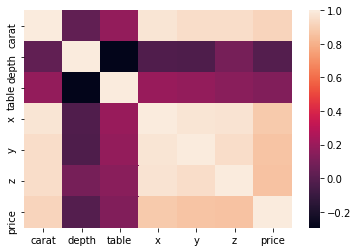

In [28]:
sns.heatmap(correlations)

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [29]:
ctg_columns = data.loc[:, data.dtypes == 'object'].columns
data = pd.get_dummies(data, columns=ctg_columns)
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [30]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [31]:
scaler = StandardScaler()
X_train.loc[:, real_columns] = scaler.fit_transform(X_train.loc[:, real_columns])
X_test.loc[:, real_columns] = scaler.transform(X_test[real_columns])

# y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
# y_test = scaler.transform(y_test.values.reshape(-1, 1))

<ipython-input-31-22d565ed0c3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, real_columns] = scaler.fit_transform(X_train.loc[:, real_columns])
<ipython-input-31-22d565ed0c3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, real_columns] = scaler.transform(X_test[real_columns])


In [32]:
X_train

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
19497,0.862659,-0.311437,-0.207099,1.055581,0.986556,0.968253,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
31229,-1.029889,0.178549,-0.656213,-1.207734,-1.202544,-1.168276,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22311,0.862659,0.458541,-0.207099,0.904099,0.951670,0.982309,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
278,0.021527,0.598537,-1.105327,0.164512,0.192898,0.251391,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6646,-0.020530,-0.031445,-0.656213,0.182333,0.184176,0.181110,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.526206,0.458541,0.691128,0.663511,0.672581,0.715243,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
44732,-0.693436,-0.521432,-1.105327,-0.628540,-0.635646,-0.676312,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
38158,-0.987832,-1.011418,0.242014,-1.109717,-1.115329,-1.182333,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
860,0.210782,0.738533,0.691128,0.351636,0.253949,0.391952,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [33]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)

print(f'Train: {mean_squared_error(y_train, prediction_train, squared=False)}\nTest: {mean_squared_error(y_test, prediction_test, squared=False)}')

Train: 1136.0202087749415
Test: 1115.69056450069


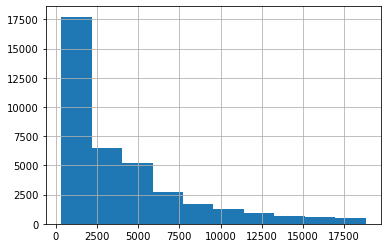

In [34]:
y_train.hist()

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [35]:
print(X_train.columns[0:6])
print(model.coef_[0:6])

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')
[ 5338.61567061   -90.17381703   -60.33227991 -1100.41885004
    -6.45891672   -34.25894462]


Для признаков carat и x коэффициенты на порядок превышают все остальное

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [36]:
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

print(lasso.coef_[0:6])
print(ridge.coef_[0:6])
print(model.coef_[0:6])

[4853.40739909 -100.46514209  -80.37216498 -696.79432665   -0.
  -32.59993671]
[ 5298.92672417   -88.82284574   -60.80455016 -1058.74512149
    -9.05173053   -37.4052479 ]
[ 5338.61567061   -90.17381703   -60.33227991 -1100.41885004
    -6.45891672   -34.25894462]


Модель lasso сильнее снизила веса, нежели ridge. Однако, в целом, веса уменьшились не сильно. Возможно пробема мультиколлениарности проявлялась не слишком сильно

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [37]:
alphas = [0.1, 1, 10, 100, 200]
result_lasso = list()
result_ridge = list()

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    ridge = Ridge(alpha=alpha)
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    
    result_lasso.append(np.linalg.norm(lasso.coef_))
    result_ridge.append(np.linalg.norm(ridge.coef_))

C:\Users\dima1\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75483763.6907425, tolerance: 60605526.52466705
  model = cd_fast.enet_coordinate_descent(


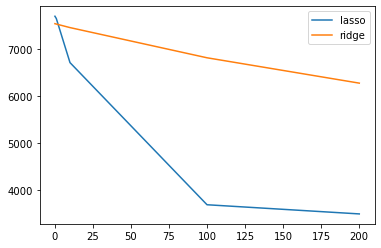

In [38]:
plt.plot(alphas, result_lasso, label='lasso')
plt.plot(alphas, result_ridge, label='ridge')
plt.legend()

Lasso гораздо агресивней снижает веса, также еще одним важным свойством этой модели (Lasso) является то, что веса близкие к нулю с большей вероятностей будут занулены, что позволяет использовать данную модель для отбора признаков, так как веса при неинформативных будут равны 0.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [39]:
from sklearn.linear_model import LassoCV

alphas = np.linspace(0.1, 100, 1000)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)

C:\Users\dima1\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75303564.11000061, tolerance: 48476565.46527789
  model = cd_fast.enet_coordinate_descent_gram(


LassoCV(alphas=array([  0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
         1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,   1.8,
         1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,
         2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,
         3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,   4.5,
         4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,   5.4,
         5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,   6.3,
         6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,   7.2,
         7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,   8.1,
         8.2,   8.3,   8.4,...
        92.8,  92.9,  93. ,  93.1,  93.2,  93.3,  93.4,  93.5,  93.6,
        93.7,  93.8,  93.9,  94. ,  94.1,  94.2,  94.3,  94.4,  94.5,
        94.6,  94.7,  94.8,  94.9,  95. ,  95.1,  95.2,  95.3,  95.4,
        95.5,  95.6,  95.7,  95.8,  95.9,  96. ,  96.1,  96.2,  96.3,
        96.4,  96.5,  96.6,  96.7,  96.8,  9

In [40]:
lasso_cv.alphas_[lasso_cv.mse_path_.mean(axis=1).argmin()]

0.4

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [46]:
lasso_final = Lasso(alpha=0.4)
lasso_final.fit(X_train, y_train)

prediction_train = lasso_final.predict(X_train)
prediction_test = lasso_final.predict(X_test)

print(mean_squared_error(y_train, prediction_train))
print(mean_squared_error(y_test, prediction_test))

1290601.8466255572
1244438.1463516972


In [51]:
for name, coef in zip(X_train.columns, lasso_final.coef_):
    print(name, coef)

carat 5319.192830863067
depth -90.58226822062869
table -61.081313474111724
x -1084.901704158612
y -5.269559792379161
z -34.40955362905063
cut_Fair -731.8173011740605
cut_Good -143.75097878395152
cut_Ideal 101.60795736717891
cut_Premium 31.983092339163864
cut_Very Good 0.0
color_D 494.6040966766882
color_E 279.22385196943384
color_F 223.3576270751317
color_G 0.0
color_H -495.57340260752983
color_I -970.4953289605489
color_J -1872.3183209639542
clarity_I1 -4406.213239352804
clarity_IF 1008.9076943479205
clarity_SI1 -683.9495427899778
clarity_SI2 -1651.2058224746318
clarity_VS1 217.11549617635572
clarity_VS2 -98.55237750384298
clarity_VVS1 657.9872846309837
clarity_VVS2 586.7976067824729


Наиболее информативными признаками оказались: 

    1) carat
    2) x
    3) cut_Fair
    4) color_J
    5) color_I
    6) clarity_I1
    7) clarity_SI2
    
Кажется вполне логичным, что различные классы алмазов и их цвет сильно влияет на цену, так же как и количество карат (самый влиятельный признак)

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [57]:
print(mean_squared_error(y_test, model.predict(X_test), squared=False),
     mean_squared_error(y_test, prediction_test, squared=False))

1115.69056450069 1115.543879169124


Лучше оказалась Lasso, хоть и незначительно. Возможно некоторая регуляризация признаков помогла избежать переобучения под тренировочную выборку или избавится от небольшой проблемы мультиколлениарности

In [59]:
from sklearn.neighbors import KNeighborsRegressor

model_temp = KNeighborsRegressor()
model_temp.fit(X_train, y_train)
prediction_temp = model_temp.predict(X_test)

print(mean_squared_error(y_test, prediction_temp, squared=False))

797.0536061746756


Заметим, что для этой задачи лучше было использовать абсолютно другой алгоритм, например обычный knn регрессор